<h2><u>Supervised Machine Learning</u></h2>

# Module 2 – Linear Regression
<h2> Demo 2: Regularization Techniques With OLS </h2>

Importing the required libraries

In [44]:
!pip install scikit-learn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Note: Version 1.2 of scikit-learn does not support the Boston dataset. Therefore, the version has been downgraded to 1.1.0 here.

In [45]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

```
Note - To understand each and every parameters functionality in detail please refer previous notebooks
```

Importing Boston datasets 

In [46]:
from sklearn import datasets
boston = datasets.load_boston()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [47]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [48]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

Printing first 2 rows of dataset for understanding.

In [49]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [50]:
boston_df['Houseprice']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Houseprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Specifying the Independent and Dependent Variable (Target Variable).

In [51]:
real_x=boston_df.iloc[:,0:13].values
real_y=boston_df.iloc[:,13].values

Performing train and testing on the dataset.

In [52]:
training_x,test_x,training_y,test_y= train_test_split(real_x,real_y,test_size=0.3, random_state=0)


**Scaling the dataset using Standard Scalar.**

In [53]:
scaler=StandardScaler()
training_x=scaler.fit_transform(training_x)
test_x=scaler.fit_transform(test_x)

**Creating Linear Regeession Model and performing Regularization.**

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet



* Linear Regression


In [55]:
lm=LinearRegression()

* Lasso


In [56]:
lasso=Lasso()
lasso

Lasso()

* Ridge


In [57]:
ridge=Ridge()
ridge

Ridge()

* Elasticnet


In [58]:
elastic=ElasticNet()
elastic

ElasticNet()


* Fitting the Model

In [59]:
lm.fit(training_x,training_y)

LinearRegression()

In [60]:
lasso.fit(training_x,training_y)

Lasso()

In [61]:
ridge.fit(training_x,training_y)

Ridge()

In [62]:
elastic.fit(training_x,training_y)

ElasticNet()

**Barplot to understand parameter shrinkage, feature selection using different Regularization techniques**

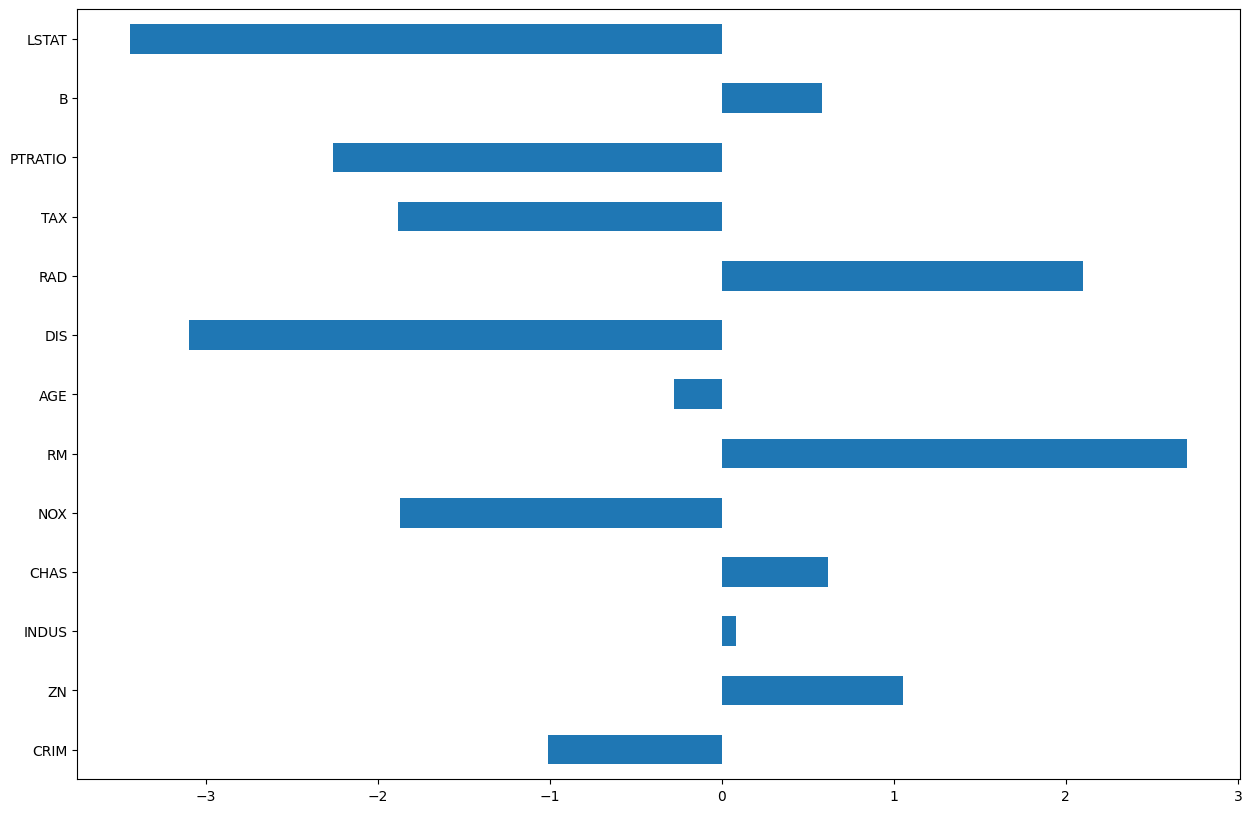

In [63]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(lm.coef_, index=boston.feature_names)
important_coeff.plot(kind="barh")
plt.show()


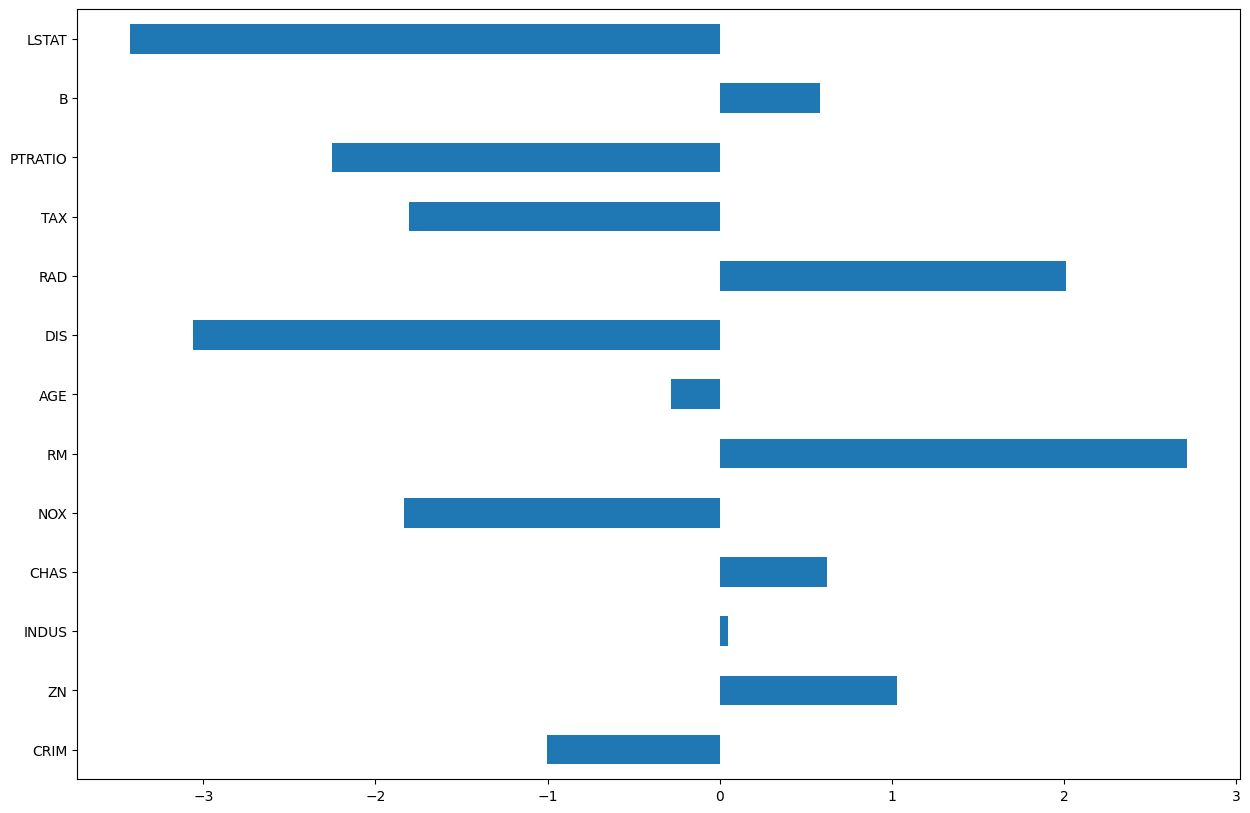

In [64]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(ridge.coef_, index=boston.feature_names)
important_coeff.plot(kind="barh")
plt.show()


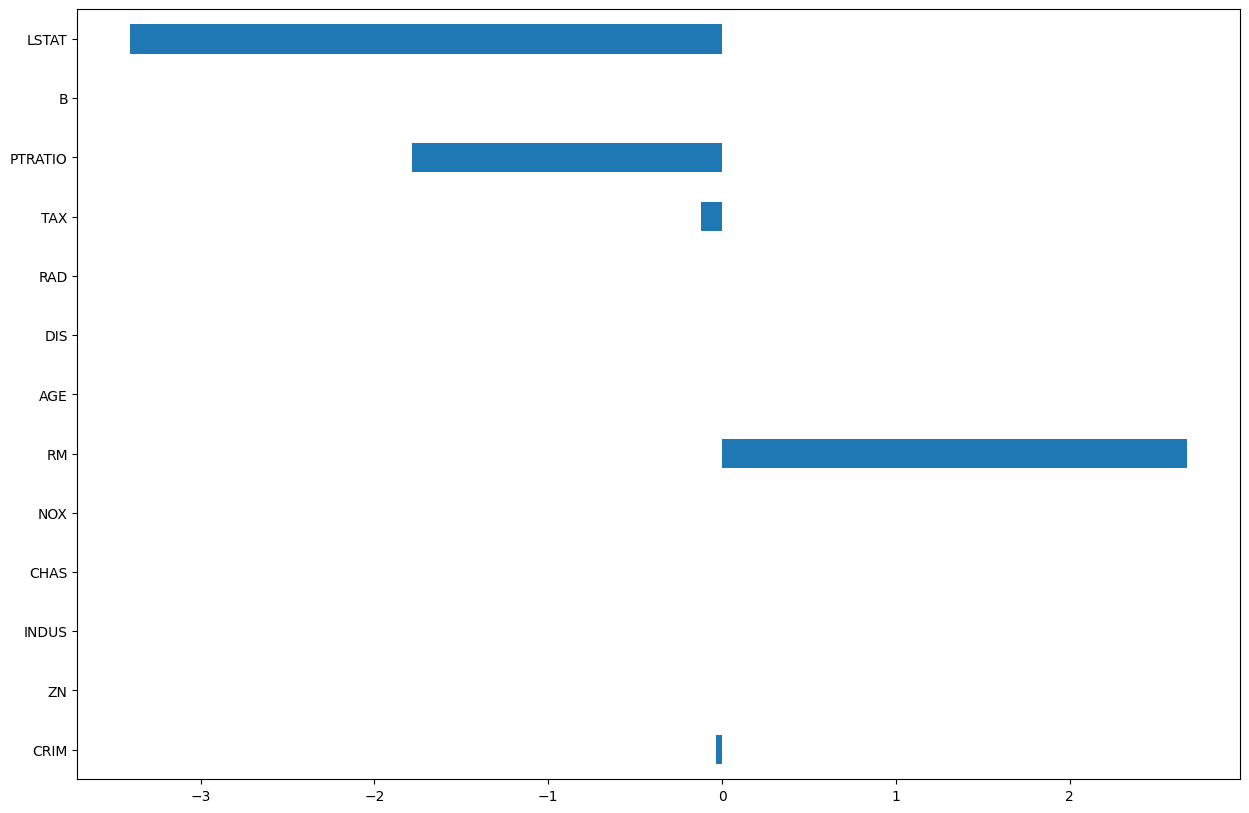

In [65]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(lasso.coef_, index=boston.feature_names)
important_coeff.plot(kind="barh")
plt.show()


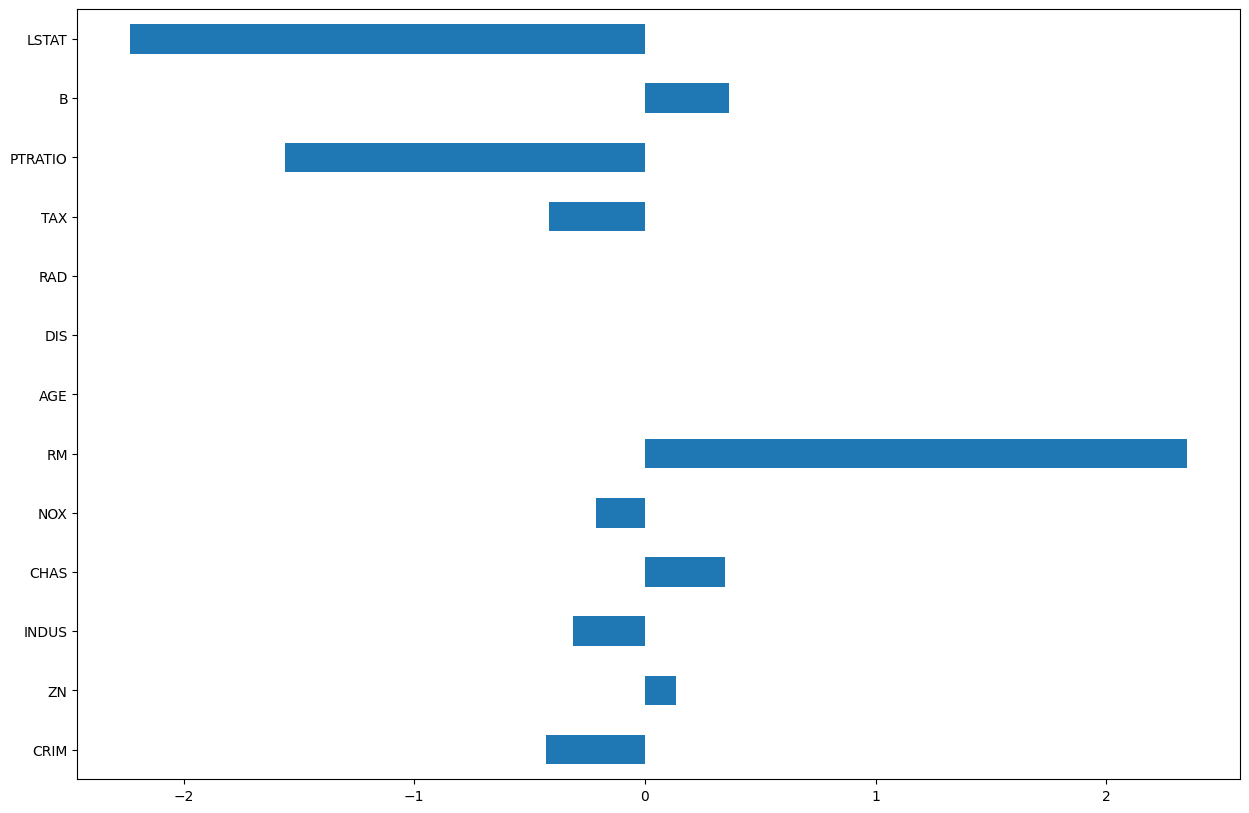

In [66]:
plt.figure(figsize=(15,10))
important_coeff=pd.Series(elastic.coef_, index=boston.feature_names)
important_coeff.plot(kind="barh")
plt.show()


***Using elastic net - This can be observed that paramters are getting shrinked and also unnecessary features that don't have any contribution on output are getting removed.***

In [67]:
pred_test_lm= lm.predict(test_x)
pred_test_ridge=ridge.predict(test_x)
pred_test_lasso=lasso.predict(test_x)
pred_test_elastic=elastic.predict(test_x)


* **Understanding performace of the model using MSE( Performance Metrics).**

In [68]:
print("Simple linear regression mean square error for  test data is")

np.round(metrics.mean_squared_error(test_y,pred_test_lm),2)

Simple linear regression mean square error for  test data is


28.38

In [69]:
print("Ridge regression mean square error for  test data is")

np.round(metrics.mean_squared_error(test_y,pred_test_ridge),2)

Ridge regression mean square error for  test data is


28.43

**Inference** - This can be observed that mse is close to 0 which means our model is good.
> Lower the value of mse better the model.


In [70]:
print("Lasso regression mean square error for  test data is")

np.round(metrics.mean_squared_error(test_y,pred_test_lasso),2)

Lasso regression mean square error for  test data is


34.1

**Inference** - This can be observed that mse is close to 0 which means our model is good.
> Lower the value of mse better the model.


In [71]:
print("Elastic net regression mean square error for  test data is")

np.round(metrics.mean_squared_error(test_y,pred_test_elastic),2)

Elastic net regression mean square error for  test data is


35.83

**Inference** - This can be observed that mse is close to 0 which means our model is good.
> Lower the value of mse better the model.


**Finding out R squared**


> Higher the value of r Squared better the model as it tells us the correlation 



In [72]:
print('Rsquare value for simple regression on test data is')

np.round(lm.score(test_x,test_y)*100,2)

Rsquare value for simple regression on test data is


65.91

**Inference- This can be inferred that the input and output have a correlation of 65%.**

> Note - Higher the r squared value better the model.


In [73]:
print('Rsquare value for ridge regression on test data is')

np.round(ridge.score(test_x,test_y)*100,2)

Rsquare value for ridge regression on test data is


65.85

**Inference- This can be inferred that the input and output have a correlation of 65%.**

> Note - Higher the r squared value better the model.


In [74]:
print('Rsquare value for lasso regression on test data is')

np.round(lasso.score(test_x,test_y)*100,2)

Rsquare value for lasso regression on test data is


59.04

**Inference- This can be inferred that the input and output have a correlation of 59%.**

> Note - Higher the r squared value better the model.


In [75]:
print('Rsquare value for elastic regression on test data is')

np.round(elastic.score(test_x,test_y)*100,2)

Rsquare value for elastic regression on test data is


56.97

**Inference- This can be inferred that the input and output have a correlation of 59%.**

> Note - Higher the r squared value better the model.


#Obtaining the alpha value

As the value of alpha increases, the model complexity reduces.
* Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well.
*Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#for ridge regression
parameters={'alpha':[1,5,10,20,30,35,40,45,50,55,100]}

ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(training_x,training_y)
print(ridge_regressor.best_params_)

#best score = Mse

print(ridge_regressor.best_score_)


{'alpha': 10}
-22.755409635801648


In [78]:
#for lasso regression
parameters={'alpha':[1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(training_x,training_y)
print(lasso_regressor.best_params_)

print(lasso_regressor.best_score_)


{'alpha': 0.01}
-22.936783818944765


In [79]:
#for elastic regression
parameters={'alpha':[1e-3,1e-2,1e-4,1,5,10,20,30,35,40,45,50,55,100]}

elastic_regressor=GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(training_x,training_y)
print(elastic_regressor.best_params_)

print(elastic_regressor.best_score_)


{'alpha': 0.01}
-22.90091501642686


**OLS Regression Summary**
> For step by step and every paramter defination please refer PPT.



In [80]:
import statsmodels.api as sm
real_x = sm.add_constant(real_x) # adding a constant
 
model = sm.OLS(real_y, real_x).fit()
predictions = model.predict(real_x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          6.72e-135
Time:                        10:42:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0